In [1]:
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud
!pip install -U pip setuptools wheel
!pip install -U spacy

In [2]:
import pandas as pd
import numpy as np

import re
import string
from os import path
from PIL import Image

import os
os.path

#Gensim
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# spacy for lemmatization
import spacy

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


C:\Users\rsabharwal.admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:585: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
C:\Users\rsabharwal.admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:627: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
C:\Users\rsabharwal.admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:637: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool

In [3]:
# Import Dataset txt file - 305 research papers 
data = pd.read_csv('C:/Users/rsabharwal.admin/OneDrive - The University of Newcastle/Literature review paper/Lit_file')

In [4]:
data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text


In [5]:
print(len(documents))
print(documents[:5])

306
                                                text  index
0  5th International Conference on Advanced Techn...      0
1   \n \n\nA comparative study of machine learnin...      1
2  2020 International Conference on Computational...      2
3  RESEARCH ARTICLE\n\nA comparison of machine le...      3
4  2019 IEEE International Conference on Big Know...      4


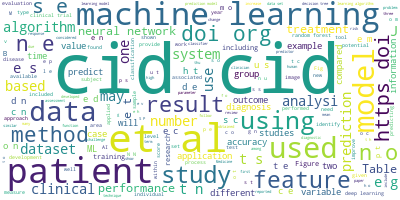

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(documents['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [7]:
# NLTK Stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
documents['text']=documents['text'].apply(remove_stopwords)

In [8]:
#Tokenize words and Clean-up text

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'et', 'al', 'doi', 'abstract', 'clinical', 'ml', 'cid', 'data', 'using', 'http','machine learning', 'used', 'ieee','receiv', 'infer', 'significant', 'patients', 'heart', 'cancer', 'none', 'model', 'university', 'research', 'editor', 'covid', 'ai', 'journal', 'features', 'learning', 'medical', 'informatio', 'treatment', 'health', 'consultant', 'care', 'risk', 'response', 'failure', 'learning', 'features','machine', 'mds', 'based', 'imaging', 'lime', 'hc', 'methods', 'university', 'tle', 'patients', 'mri', 'org', 'temporal', 'vol', 
                   'network', 'pe', 'ct', 'alk', 'test', 'non', 'pet', 'two', 'set', 'inr', 'https', 'ac', 'vp', 'moto', 'ckd', 'cad', 'med', 'set', 'may', 'time', 'also', 'table', 'images', 'high', 'site', 'na', 'hf', 'sites', 'chr', 'follow', 'image', 'asd', 'ados', 'social', 'items', 'user', 'food', 'rule', 'mobile', 'https', 'application', 'applications', 'new', 'early', 'process', 'jmir', 'full', 'ncr', 'one', 'med', 'plos', 'pone', 'fig', 'ts', 'line', 'number', 'pmid', 'pp', 'note', 'oa', 'vector', 'set', 'de', 'pd', 'word', 'auc', 'copd','iv'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = documents.text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rsabharwal.admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['th', 'international', 'conference', 'advanced', 'technologies', 'signal', 'processing', 'atsip', 'september', 'sfax', 'tunisia', 'mia', 'support', 'system', 'prediction', 'disease', 'techniques', 'halima', 'el', 'hamdaoui', 'said', 'boujraf', 'nour', 'el', 'houda', 'chaoui', 'mustapha', 'maaroufi', 'neuroscience', 'laboratory']


In [9]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rsabharwal.admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import PorterStemmer
>>> stemmer=PorterStemmer()
>>> stemmer.stem('numpang wifi stop gadget shopping')
'numpang wifi stop gadget shopping'

'numpang wifi stop gadget shopping'

In [11]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
doc = documents[documents['index'] == 305].values[0][0]
print('original document: ')
words = []
for word in doc.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc))

original document: 
['Beyer', 'et', 'al.', 'Cancer', 'Imaging', '', '', '', '', '', '', '', '', '', '', '(2020)', '20:38', '\nhttps://doi.org/10.1186/s40644-020-00312-3\n\nR', 'E', 'V', 'I', 'E', 'W\n\nOpen', 'Access\n\nWhat', 'scans', 'read:', 'imaging\ninstrumentation', 'trends', 'clinical', 'oncology\nThomas', 'Beyer1*,', 'Luc', 'Bidaut2,', 'John', 'Dickson3,', 'Marc', 'Kachelriess4,', 'Fabian', 'Kiessling5,6,', 'Rainer', 'Leitgeb7,', 'Jingfei', 'Ma8,\nLalith', 'Kumar', 'Shiyam', 'Sundar1,', 'Benjamin', 'Theek5,6', 'Osama', 'Mawlawi8\n\nAbstract\n\nOncological', 'diseases', 'account', 'significant', 'portion', 'burden', 'public', 'healthcare', 'systems', 'associated\ncosts', 'driven', 'primarily', 'complex', 'long-lasting', 'therapies.', 'Through', 'visualization', 'patient-specific\nmorphology', 'functional-molecular', 'pathways,', 'cancerous', 'tissue', 'detected', 'characterized', 'non-\ninvasively,', 'provide', 'referring', 'oncologists', 'essential', 'information', 'support', '

['beyer', 'cancer', 'imag', 'http', 'open', 'access', 'scan', 'read', 'imag', 'instrument', 'trend', 'clinic', 'oncolog', 'thoma', 'beyer', 'bidaut', 'john', 'dickson', 'marc', 'kachelriess', 'fabian', 'kiessl', 'rainer', 'leitgeb', 'jingfei', 'lalith', 'kumar', 'shiyam', 'sundar', 'benjamin', 'theek', 'osama', 'mawlawi', 'abstract', 'oncolog', 'diseas', 'account', 'signific', 'portion', 'burden', 'public', 'healthcar', 'system', 'associ', 'cost', 'drive', 'primarili', 'complex', 'long', 'last', 'therapi', 'visual', 'patient', 'specif', 'morpholog', 'function', 'molecular', 'pathway', 'cancer', 'tissu', 'detect', 'character', 'invas', 'provid', 'refer', 'oncologist', 'essenti', 'inform', 'support', 'therapi', 'manag', 'decis', 'follow', 'onset', 'stand', 'anatom', 'function', 'imag', 'wit', 'push', 'integr', 'molecular', 'imag', 'inform', 'method', 'includ', 'anato', 'metabol', 'imag', 'advanc', 'optic', 'ultrasound', 'imag', 'perspect', 'paper', 'highlight', 'number', 'technolog', 'me

In [13]:
# Do lemmatization keeping only noun, adj, verb, adv
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [14]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 6), (5, 1), (6, 22), (7, 2), (8, 7), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 3), (15, 1), (16, 2), (17, 1), (18, 1), (19, 11), (20, 16), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2)]


In [15]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:50]

0     [intern, confer, advanc, technolog, signal, im...
1     [compar, studi, machin, learn, techniqu, clini...
2     [intern, confer, comput, scienc, comput, intel...
3     [research, articl, comparison, machin, learn, ...
4     [ieee, intern, confer, knowledg, icbk, ieee, i...
5     [ieee, author, licens, limit, univers, newcast...
6     [open, amend, paper, machin, learn, approach, ...
7     [research, articl, machin, learn, approach, pr...
8     [ieee, intern, confer, data, data, ieee, artic...
9     [origin, research, publish, march, fonc, machi...
10    [machin, learn, base, algorithm, assess, clini...
11    [review, articl, page, narr, review, machin, l...
12    [receiv, septemb, accept, octob, date, public,...
13    [content, list, avail, sciencedirect, biomed, ...
14    [comput, biolog, medicin, content, list, avail...
15    [salem, inform, deci, http, research, open, ac...
16    [connolli, bioinformat, open, access, nonparam...
17    [content, list, avail, sciencedirect, biom

In [16]:
#Create the Dictionary and Corpus needed for Topic Modeling

dictionary = corpora.Dictionary(data_words)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data_words]

In [17]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [18]:
lda_model.print_topics()

[(0,
  '0.008*"study" + 0.008*"disease" + 0.006*"prediction" + 0.005*"results" + 0.005*"analysis" + 0.005*"feature" + 0.004*"models" + 0.004*"mortality" + 0.004*"laboratory" + 0.004*"diabetes"'),
 (1,
  '0.021*"circulation" + 0.020*"professor" + 0.016*"cardiovascular" + 0.016*"associate" + 0.013*"medicine" + 0.011*"guest" + 0.011*"board" + 0.010*"american" + 0.009*"member" + 0.009*"interest"'),
 (2,
  '0.013*"text" + 0.006*"language" + 0.006*"extraction" + 0.006*"nlp" + 0.005*"system" + 0.005*"information" + 0.005*"embeddings" + 0.005*"semantic" + 0.005*"criteria" + 0.005*"concept"'),
 (3,
  '0.006*"ao" + 0.004*"study" + 0.004*"proteins" + 0.003*"para" + 0.003*"colitis" + 0.003*"com" + 0.003*"protein" + 0.003*"feature" + 0.003*"da" + 0.003*"analysis"'),
 (4,
  '0.006*"screening" + 0.006*"diabetes" + 0.006*"detection" + 0.005*"reading" + 0.005*"breast" + 0.005*"study" + 0.004*"ibd" + 0.004*"messages" + 0.004*"implementation" + 0.004*"radiologists"'),
 (5,
  '0.007*"psychosis" + 0.005*"p

In [19]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.065646  0.004543       1        1  12.728937
6      0.070453 -0.070967       2        1  11.589648
19     0.047166 -0.033133       3        1  10.876724
9      0.034391  0.023311       4        1   9.463715
16     0.042010  0.000720       5        1   6.233010
0      0.056259  0.040424       6        1   6.191649
13     0.055106 -0.060917       7        1   5.606614
10     0.044439  0.015688       8        1   5.079837
18     0.043997  0.033925       9        1   4.954622
8      0.031749 -0.064570      10        1   4.097889
5      0.022213 -0.037059      11        1   3.815845
7      0.035533  0.025241      12        1   3.460754
3      0.010887  0.069659      13        1   3.225774
2      0.033228 -0.162182      14        1   3.081350
17     0.036973  0.012051      15        1   2.625028
11    -0.014367  0.068107      16        1   1.874176
12    -0.019593  0.001900      17        1   1.757542
1     -0.401673 -0.081447      18        1   1.331938
15    -0.100610  0.157519      19        1   1.166709
4     -0.093808  0.057187      20        1   0.838240, topic_info=                Term         Freq        Total Category  logprob  loglift
4737            text   986.000000   986.000000  Default  30.0000  30.0000
2040        diabetes  1060.000000  1060.000000  Default  29.0000  29.0000
88    cardiovascular   609.000000   609.000000  Default  28.0000  28.0000
407         medicine  1695.000000  1695.000000  Default  27.0000  27.0000
650            study  4877.000000  4877.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
1064        increase    26.188367   539.394340  Topic20  -5.8539   1.7565
1293          review    26.806791  1665.272941  Topic20  -5.8306   0.6525
2670          united    22.122401   313.724353  Topic20  -6.0227   2.1297
486          patient    25.716899  2957.812860  Topic20  -5.8721   0.0366
649          studies    24.003163  2521.440836  Topic20  -5.9411   0.1272

[1577 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
31285      2  0.875759       aaa
31285      3  0.037266       aaa
31285      5  0.055900       aaa
31285      8  0.018633       aaa
44963      6  0.934460      aaps
...      ...       ...       ...
5501      15  0.025693      ﬁrst
5501      16  0.005709      ﬁrst
5501      17  0.008564      ﬁrst
5501      19  0.134173      ﬁrst
36585     11  0.941614  ﬁxations

[7712 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 7, 20, 10, 17, 1, 14, 11, 19, 9, 6, 8, 4, 3, 18, 12, 13, 2, 16, 5])

In [20]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=305))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.855378536321144

Coherence Score:  0.3724024189689453


In [21]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data_words, start=2, limit=50, step=1)

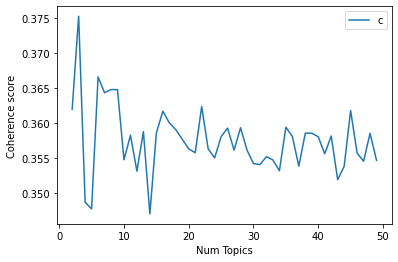

In [23]:

# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.362
Num Topics = 3  has Coherence Value of 0.3753
Num Topics = 4  has Coherence Value of 0.3486
Num Topics = 5  has Coherence Value of 0.3477
Num Topics = 6  has Coherence Value of 0.3666
Num Topics = 7  has Coherence Value of 0.3643
Num Topics = 8  has Coherence Value of 0.3648
Num Topics = 9  has Coherence Value of 0.3648
Num Topics = 10  has Coherence Value of 0.3547
Num Topics = 11  has Coherence Value of 0.3583
Num Topics = 12  has Coherence Value of 0.3531
Num Topics = 13  has Coherence Value of 0.3588
Num Topics = 14  has Coherence Value of 0.347
Num Topics = 15  has Coherence Value of 0.3586
Num Topics = 16  has Coherence Value of 0.3617
Num Topics = 17  has Coherence Value of 0.36
Num Topics = 18  has Coherence Value of 0.359
Num Topics = 19  has Coherence Value of 0.3577
Num Topics = 20  has Coherence Value of 0.3563
Num Topics = 21  has Coherence Value of 0.3557
Num Topics = 22  has Coherence Value of 0.3624
Num Topics = 23  has Coher

In [25]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20)

[(0,
  '0.005*"analysis" + 0.005*"study" + 0.005*"models" + 0.004*"prediction" + 0.003*"disease" + 0.003*"performance" + 0.003*"different" + 0.003*"results" + 0.003*"patient" + 0.002*"feature" + 0.002*"system" + 0.002*"accuracy" + 0.002*"diagnosis" + 0.002*"classification" + 0.002*"studies" + 0.002*"medicine" + 0.002*"value" + 0.002*"approach" + 0.002*"variables" + 0.002*"review"'),
 (1,
  '0.006*"models" + 0.004*"prediction" + 0.004*"study" + 0.003*"analysis" + 0.003*"disease" + 0.003*"results" + 0.003*"patient" + 0.003*"performance" + 0.003*"studies" + 0.002*"accuracy" + 0.002*"information" + 0.002*"training" + 0.002*"different" + 0.002*"system" + 0.002*"decision" + 0.002*"method" + 0.002*"algorithm" + 0.002*"medicine" + 0.002*"diagnosis" + 0.002*"algorithms"'),
 (2,
  '0.004*"study" + 0.004*"models" + 0.004*"prediction" + 0.003*"analysis" + 0.003*"results" + 0.003*"disease" + 0.003*"performance" + 0.003*"feature" + 0.002*"neural" + 0.002*"accuracy" + 0.002*"studies" + 0.002*"patient

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.004445 -0.001795       1        1  20.335662
6      0.005068  0.002925       2        1  17.689398
8     -0.003597  0.004746       3        1  14.487049
1      0.001168 -0.004932       4        1  10.971923
2     -0.006242 -0.000580       5        1  10.100831
5      0.002551 -0.000860       6        1   9.803596
4      0.002510  0.004426       7        1   9.407188
7      0.000301  0.000819       8        1   6.559677
3      0.002686 -0.004749       9        1   0.644677, topic_info=           Term         Freq        Total Category  logprob  loglift
426      models  4329.000000  4329.000000  Default  30.0000  30.0000
650       study  4987.000000  4987.000000  Default  29.0000  29.0000
486     patient  2882.000000  2882.000000  Default  28.0000  28.0000
506  prediction  3737.000000  3737.000000  Default  27.0000  27.0000
254     feature  2305.000000  2305.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
166    decision    11.191022  1979.820821   Topic9  -6.4416  -0.1315
6      accuracy    11.387381  2558.588338   Topic9  -6.4242  -0.3705
660     support     9.766022  1730.724455   Topic9  -6.5778  -0.1332
192   diagnosis     9.851743  2026.595925   Topic9  -6.5690  -0.2823
201     disease    10.187989  3355.106474   Topic9  -6.5355  -0.7529

[857 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
7255       1  0.180464  abbott
7255       2  0.135348  abbott
7255       3  0.120309  abbott
7255       4  0.060155  abbott
7255       5  0.225580  abbott
...      ...       ...     ...
58040      8  0.185572      βs
36424      2  0.499224      ξt
27396      1  0.481357      𝑑𝑖
27396      2  0.240679      𝑑𝑖
27396      6  0.240679      𝑑𝑖

[3684 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 9, 2, 3, 6, 5, 8, 4])

In [27]:
#TFinding the dominant topic in each sentence

def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=data_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
     # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=doc_term_matrix, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.5048,"study, disease, analysis, studies, models, acc...","[th, international, conference, advanced, tech..."
1,1,6.0,0.6078,"study, analysis, feature, models, performance,...","[comparative, study, techniques, systems, cont..."
2,2,6.0,0.9014,"study, analysis, feature, models, performance,...","[international, conference, computational, sci..."
3,3,1.0,0.5276,"models, prediction, study, analysis, disease, ...","[article, comparison, models, versus, evaluati..."
4,4,2.0,0.9884,"study, models, prediction, analysis, results, ...","[international, conference, big, knowledge, ic..."
5,5,8.0,0.6417,"study, disease, analysis, studies, models, acc...","[authorized, licensed, limited, newcastle, dow..."
6,6,0.0,0.5757,"analysis, study, models, prediction, disease, ...","[open, amendments, paper, approach, forecast, ..."
7,7,3.0,0.4755,"models, study, analysis, patient, feature, pre...","[article, approach, predict, extreme, inactivi..."
8,8,5.0,0.7622,"prediction, analysis, models, study, disease, ...","[international, conference, big, big, article,..."
9,9,0.0,0.6624,"analysis, study, models, prediction, disease, ...","[original, published, march, fonc, radiomics, ..."


In [28]:
#Find the most representative document for each topic
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9991,"analysis, study, models, prediction, disease, performance, different, results, patient, feature","[contents, lists, available, sciencedirect, computers, biology, medicine, homepage, www, elsevie..."
1,1.0,0.9991,"models, prediction, study, analysis, disease, results, patient, performance, studies, accuracy","[bioinformatics, bioinformatics, btaa, advance, access, publication, date, december, original, p..."
2,2.0,0.9999,"study, models, prediction, analysis, results, disease, performance, feature, neural, accuracy","[last, name, first, name, role, employment, financial, interest, thrombosis, vascular, biology, ..."
3,3.0,0.7204,"models, study, analysis, patient, feature, prediction, system, studies, results, training","[www, nature, com, npjdigitalmed, brief, communication, national, institutes, funding, applying,..."
4,4.0,0.9938,"study, models, analysis, prediction, patient, disease, information, accuracy, training, results","[gigascience, gigascience, gix, advance, access, publication, date, march, need, approximate, ca..."
5,5.0,0.9968,"prediction, analysis, models, study, disease, patient, information, results, validation, training","[saci, th, international, symposium, applied, computational, intelligence, informatics, timi, oa..."
6,6.0,0.9890,"study, analysis, feature, models, performance, prediction, disease, studies, patient, accuracy","[wijnberge, trials, open, access, algorithm, predicts, hypotension, surgery, combination, person..."
7,7.0,0.9994,"study, models, disease, patient, prediction, results, performance, analysis, accuracy, algorithms","[nih, public, access, author, manuscript, int, radiat, oncol, biol, phys, author, manuscript, av..."
8,8.0,0.9997,"study, disease, analysis, studies, models, accuracy, prediction, performance, decision, algorithm","[histopathology, human, loop, evaluation, pathologists, interaction, artiﬁcial, intelligence, pr..."


In [29]:
#Topic distribution across documents
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 5)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
pd.set_option('display.max_rows', None)
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,8.0,"study, disease, analysis, studies, models, accuracy, prediction, performance, decision, algorithm",58.0,0.18954
1.0,6.0,"study, analysis, feature, models, performance, prediction, disease, studies, patient, accuracy",31.0,0.10131
2.0,6.0,"study, analysis, feature, models, performance, prediction, disease, studies, patient, accuracy",31.0,0.10131
3.0,1.0,"models, prediction, study, analysis, disease, results, patient, performance, studies, accuracy",2.0,0.00654
4.0,2.0,"study, models, prediction, analysis, results, disease, performance, feature, neural, accuracy",34.0,0.11111
5.0,8.0,"study, disease, analysis, studies, models, accuracy, prediction, performance, decision, algorithm",32.0,0.10458
6.0,0.0,"analysis, study, models, prediction, disease, performance, different, results, patient, feature",57.0,0.18627
7.0,3.0,"models, study, analysis, patient, feature, prediction, system, studies, results, training",18.0,0.05882
8.0,5.0,"prediction, analysis, models, study, disease, patient, information, results, validation, training",43.0,0.14052
9.0,0.0,"analysis, study, models, prediction, disease, performance, different, results, patient, feature",NaN,NaN


In [30]:
pd.set_option('display.max_rows', None)

In [31]:
print(df_dominant_topics)

       Dominant_Topic  \
0.0               8.0   
1.0               6.0   
2.0               6.0   
3.0               1.0   
4.0               2.0   
5.0               8.0   
6.0               0.0   
7.0               3.0   
8.0               5.0   
9.0               0.0   
10.0              0.0   
11.0              2.0   
12.0              4.0   
13.0              6.0   
14.0              4.0   
15.0              0.0   
16.0              1.0   
17.0              6.0   
18.0              0.0   
19.0              1.0   
20.0              4.0   
21.0              0.0   
22.0              4.0   
23.0              0.0   
24.0              4.0   
25.0              8.0   
26.0              6.0   
27.0              6.0   
28.0              7.0   
29.0              0.0   
30.0              6.0   
31.0              0.0   
32.0              0.0   
33.0              0.0   
34.0              0.0   
35.0              6.0   
36.0              4.0   
37.0              0.0   
38.0              0.0   


In [32]:
df_dominant_topics.to_csv('LDA_topic_modeling.csv')

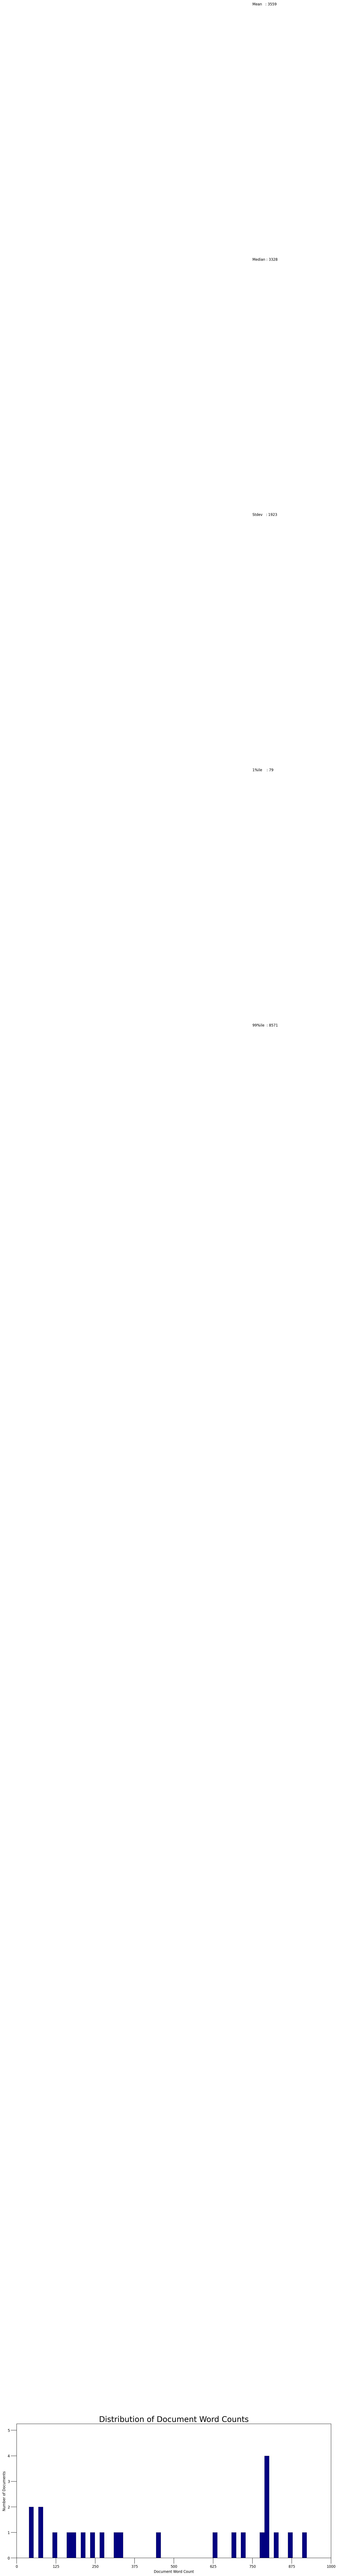

In [33]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

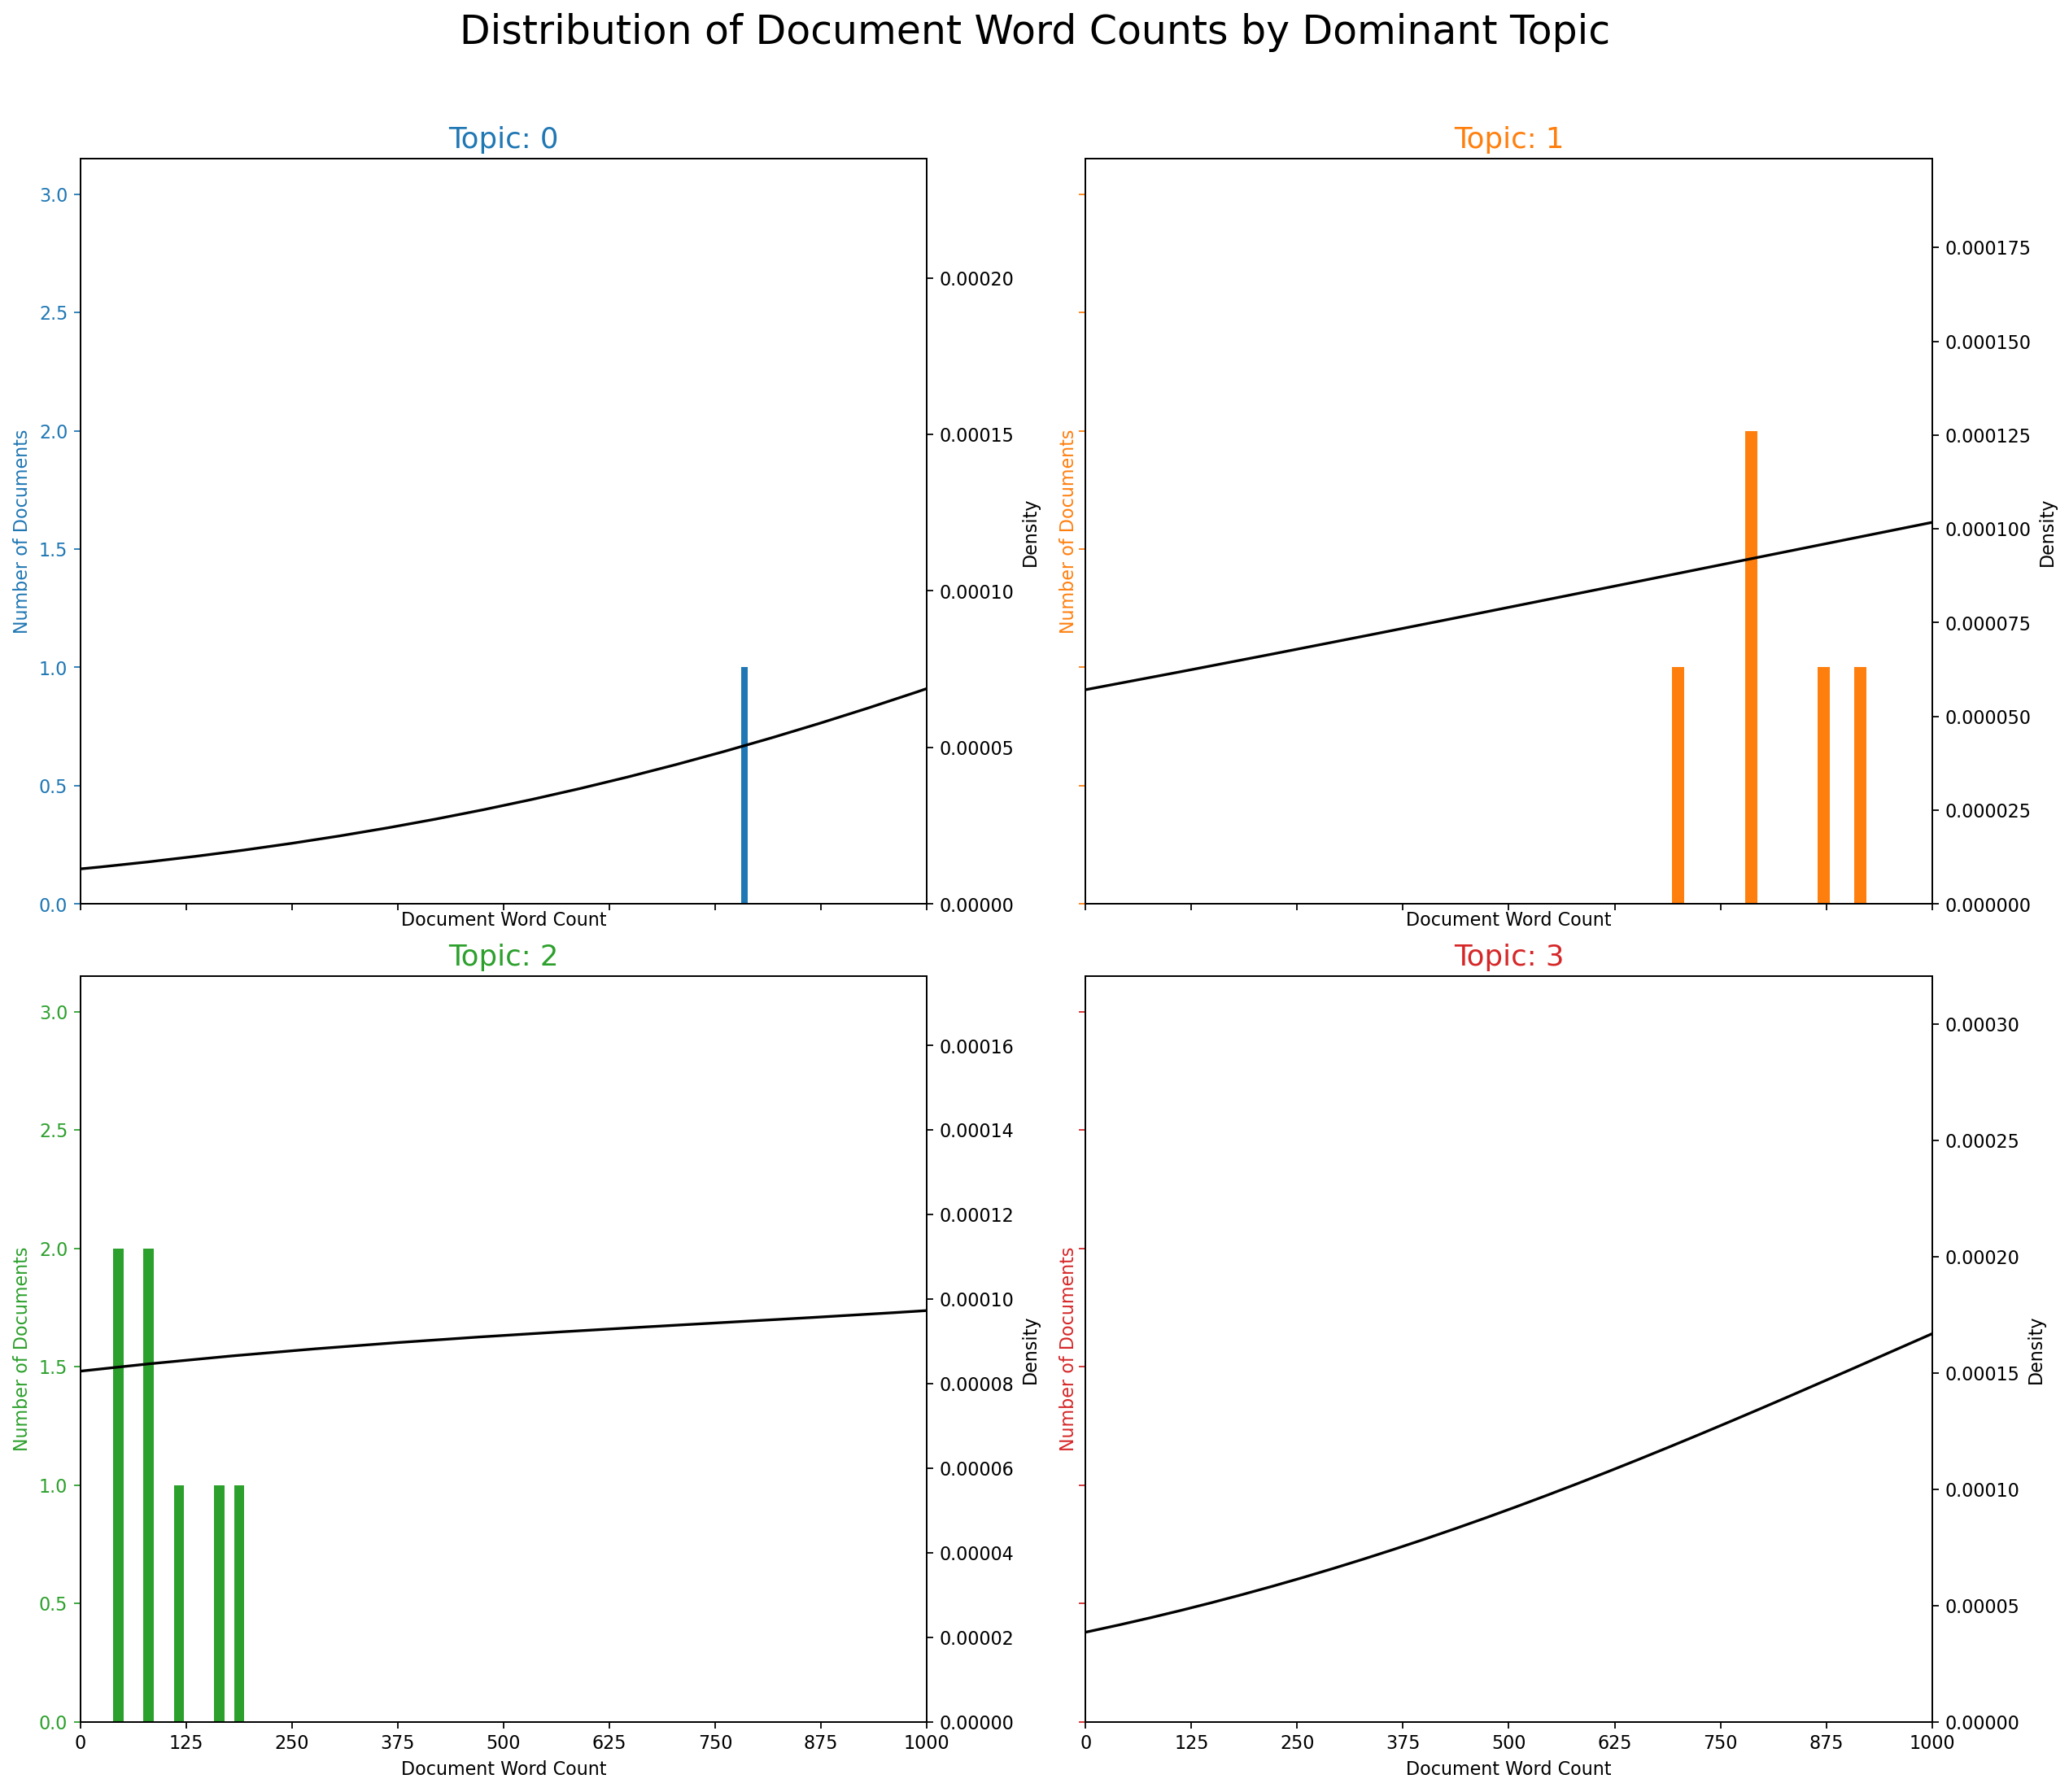

In [34]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

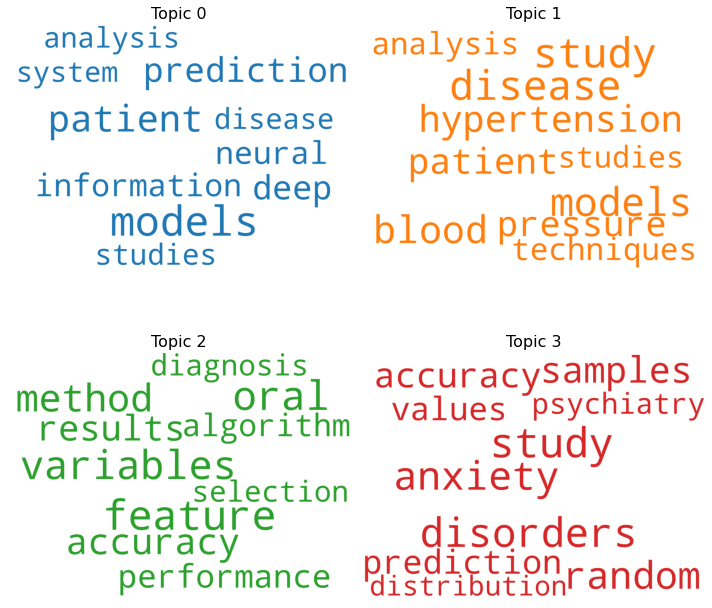

In [35]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\RSABHA~1.ADM\AppData\Local\Temp/ipykernel_7484/2773411210.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\RSABHA~1.ADM\AppData\Local\Temp/ipykernel_7484/2773411210.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


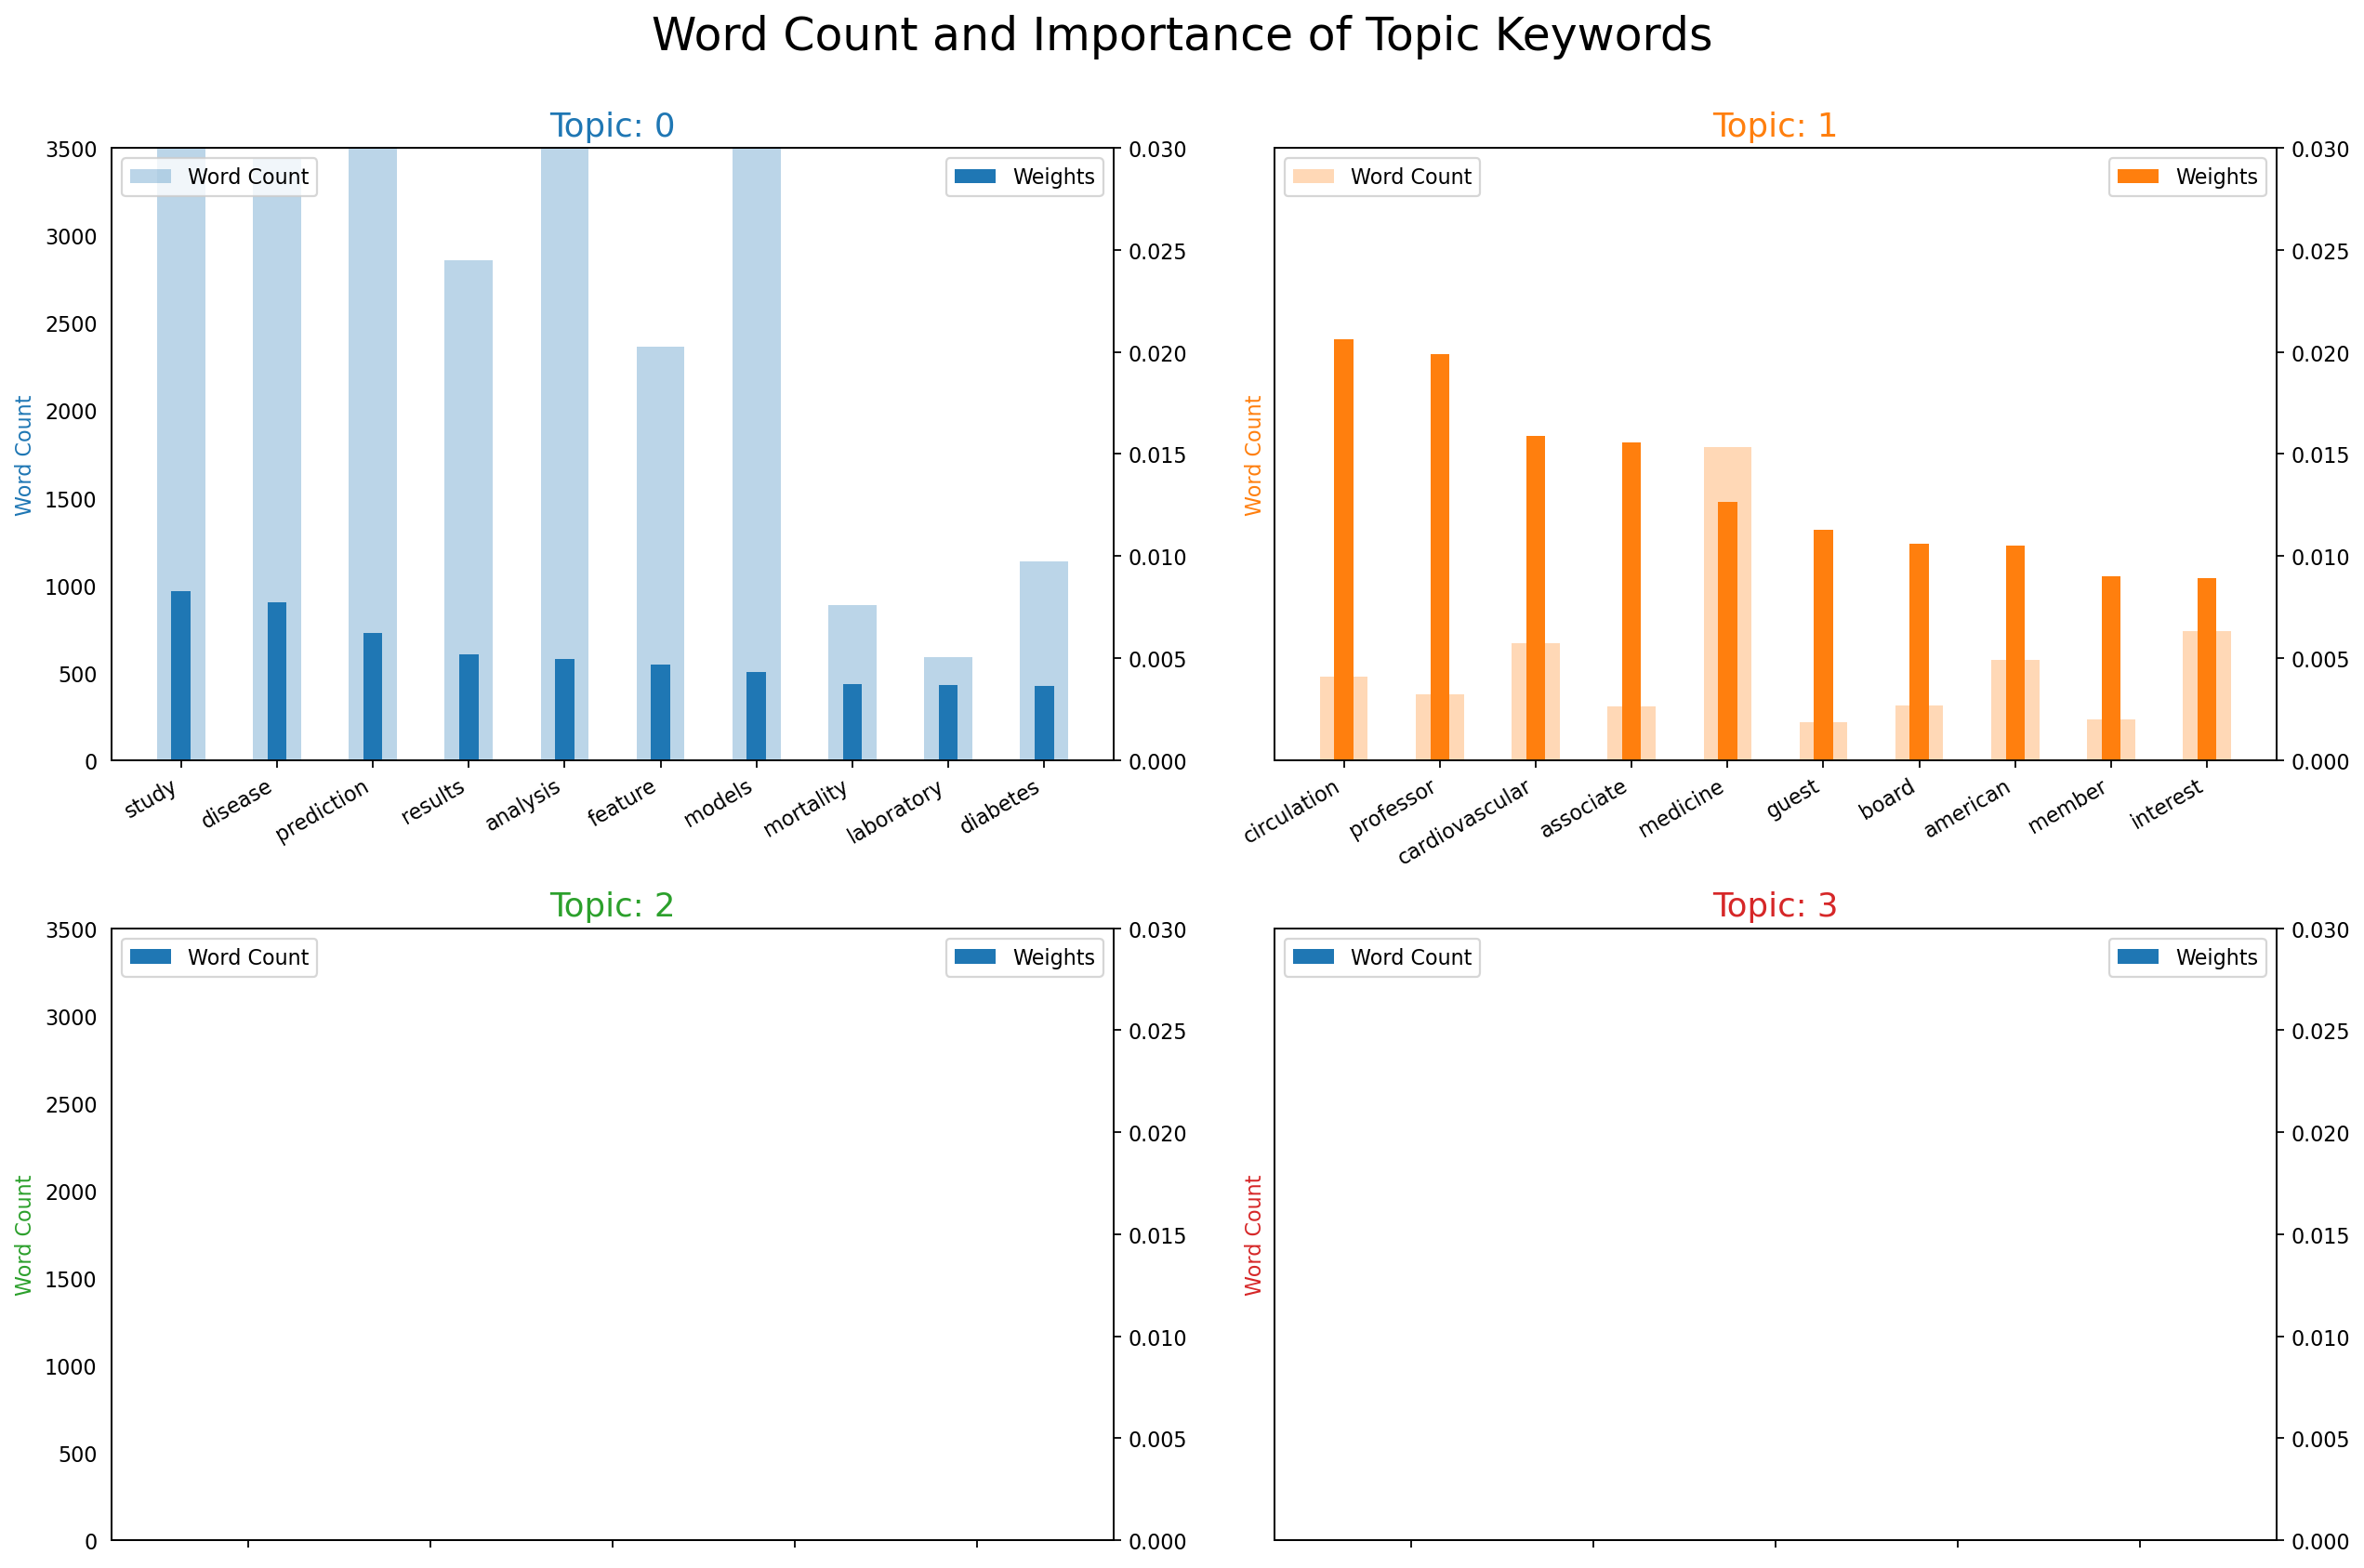

In [36]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

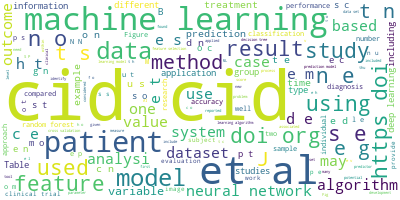

In [37]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(documents['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
